# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
#print(mouse_metadata)
#print(study_results)
total_df.head()

FileNotFoundError: [Errno 2] File data/Mouse_metadata.csv does not exist: 'data/Mouse_metadata.csv'

In [ ]:
# Checking the number of mice.
mouse_counts = total_df["Mouse ID"].unique()
mice_count=len(mouse_counts)
mice_count

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = (total_df[["Mouse ID", "Timepoint"]])
mouse_g989 = mouse_duplicate[mouse_duplicate["Mouse ID"] == "g989"]
mouse_g989.head()

In [2]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = total_df[total_df["Mouse ID"] == "g989"]
g989.head()

NameError: name 'total_df' is not defined

In [232]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = total_df.drop_duplicates()
clean_mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [233]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse)

1892

## Summary Statistics

In [234]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_drug = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_drug = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_drug = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev_drug = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_drug = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

stat_summary = pd.DataFrame({"mean": mean_drug,
                            "median": median_drug,
                            "var": var_drug,
                            "std": stdev_drug,
                            "sem": sem_drug})
stat_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [235]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     160
Name: Drug Regimen, dtype: int64

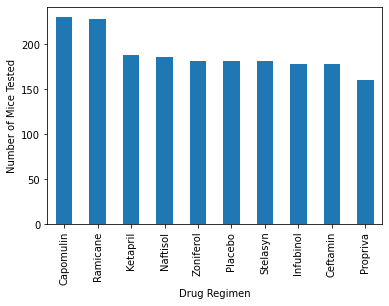

In [236]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_reg_count = clean_mouse["Drug Regimen"].value_counts()
drug_reg_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
#plt.show()
drug_reg_count

Text(0, 0.5, 'Number of Mice Tested')

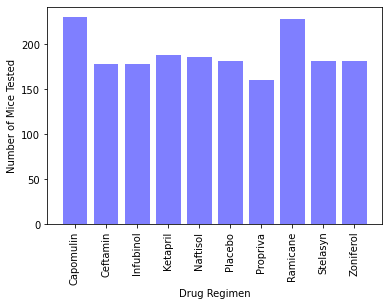

In [237]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint = clean_mouse[["Drug Regimen","Timepoint"]]
timepoint = timepoint.groupby("Drug Regimen").count()
timepoint
x_axis = np.arange(len(timepoint))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, timepoint["Timepoint"], color="b", alpha=0.5, align="center")
plt.xticks(tick_locations, timepoint.index, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

Text(0, 0.5, 'Sex')

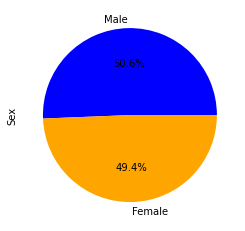

In [238]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_mouse["Sex"].value_counts()
colors = ["blue", "orange"]
plt.pie(sex.values, labels=sex.index.values, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")


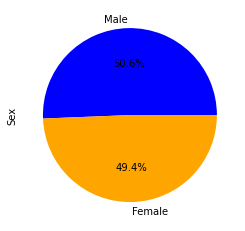

In [239]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_mouse["Sex"].value_counts()
colors = ["blue", "orange"]
sex.plot(kind="pie", y = "Mouse ID", colors = colors, autopct="%1.1f%%" )


## Quartiles, Outliers and Boxplots

In [240]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_vol = clean_mouse.groupby("Mouse ID")["Timepoint"].max()
final_vol = final_vol.reset_index()
final_vol
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = final_vol.merge(total_df, on=["Mouse ID", "Timepoint"], how="left")
new_df.head()

#new_df["Drug Regimen"].unique()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [241]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in drug_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_count = new_df.loc[new_df["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_count)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_count.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound = lowerq -(1.5*iqr)
    upper_bound = upperq +(1.5*iqr)
    outliers = tumor_count.loc[(tumor_count < lower_bound) | (tumor_count > upper_bound)]

    print(f"{drugs}'s potential outliers: {outliers}\n")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



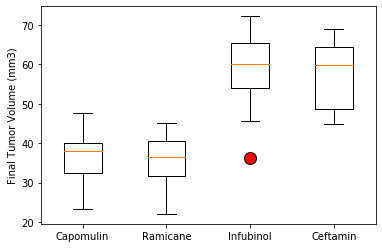

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,5))
outlier_colors = dict(markerfacecolor = "red", markersize=8)

plt.boxplot(tumor_vol_data, labels=drug_regimens, flierprops=outlier_colors)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")


## Line and Scatter Plots

In [216]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_mouse.loc[clean_mouse["Drug Regimen"] == "Capomulin"]
#capomulin_df
mouse_i557 = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557"]
#mouse_i557
x_axis = mouse_i557["Timepoint"]
y_axis = mouse_i557["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment for mouse i557")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22


In [284]:
capomulin_mean = capomulin_df.groupby("Mouse ID").mean()
#capomulin_df
plt.scatter(capomulin_mean["Weight (g)"], capomulin_mean["Tumor Volume (mm3)"])
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


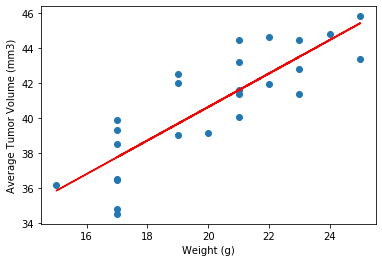

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_mean["Weight (g)"]
y_values = capomulin_mean["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (m3)")
#capomulin_df
print(f"The correlation between mouse weight and average tumor volume is {rvalue**2}")
plt.show()
